In [1]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from datetime import datetime, timedelta

# Some analysis related to NVDA earnings reports

## Specify parameters for analysis

In [2]:
FILEPATH = "c:/Users/steve/Documents/"
FILENAME = "nvda_earnings_dates.csv"
holding_period = 20
start_date_string = "2017-12-01"
end_date_string = pd.Timestamp.today().strftime("%Y-%m-%d")

## Get data

In [3]:
# Get daily price data
nvda = yf.Ticker("NVDA")
daily_ohlc = nvda.history(start=start_date_string, end=end_date_string, interval="1D")

D:\Users\steve\anaconda3\envs\my_quant_lab2\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [4]:
daily_ohlc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-12-01 00:00:00-05:00,49.302892,49.505735,47.610897,48.899681,81154800,0.0,0.0
2017-12-04 00:00:00-05:00,49.485947,49.547789,45.639375,46.173691,124084400,0.0,0.0
2017-12-05 00:00:00-05:00,45.119909,47.667800,44.669702,46.440857,98148800,0.0,0.0
2017-12-06 00:00:00-05:00,45.936208,47.034522,45.723472,46.816837,46703200,0.0,0.0
2017-12-07 00:00:00-05:00,47.484744,47.890427,47.029584,47.492165,54260000,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-13 00:00:00-05:00,704.000000,734.500000,696.200012,721.280029,60258000,0.0,0.0
2024-02-14 00:00:00-05:00,732.020020,742.359985,719.380005,739.000000,50491700,0.0,0.0
2024-02-15 00:00:00-05:00,738.690002,739.750000,724.000000,726.580017,42012200,0.0,0.0


In [5]:
# Read the NVDA earnings dates
report_df = pd.read_csv(FILEPATH + FILENAME)

In [6]:
# Since the data from yfinance is localized to US Eastern time, set up
# a DateTimeIndex on the internals data that is also localized to US Eastern time.
# Doing this is necessary for the join later to work.
report_df['Earnings_Date'] = pd.to_datetime(report_df['Date']).dt.tz_localize("US/Eastern")
report_df.set_index(report_df['Earnings_Date'], inplace=True)

In [7]:
report_df

,Date,Earnings_Date
Earnings_Date,,
2016-05-12 00:00:00-04:00,5/12/2016,2016-05-12 00:00:00-04:00
2016-08-11 00:00:00-04:00,8/11/2016,2016-08-11 00:00:00-04:00
2016-11-10 00:00:00-05:00,11/10/2016,2016-11-10 00:00:00-05:00
2017-02-09 00:00:00-05:00,2/9/2017,2017-02-09 00:00:00-05:00
2017-05-09 00:00:00-04:00,5/9/2017,2017-05-09 00:00:00-04:00
2017-08-10 00:00:00-04:00,8/10/2017,2017-08-10 00:00:00-04:00
2017-11-09 00:00:00-05:00,11/9/2017,2017-11-09 00:00:00-05:00
2018-02-08 00:00:00-05:00,2/8/2018,2018-02-08 00:00:00-05:00
2018-05-10 00:00:00-04:00,5/10/2018,2018-05-10 00:00:00-04:00


### Join the price data with the earnings report dates

In [8]:
# Join market internals with the S&P 500 data
analysis_df = pd.merge(daily_ohlc['Close'], report_df, how = "left", left_index=True, right_index=True)[
    ['Close', 'Earnings_Date']]

In [9]:
analysis_df[-62:-42]

,Close,Earnings_Date
Date,,
2023-11-20 05:00:00+00:00,504.045685,NaT
2023-11-21 05:00:00+00:00,499.396088,2023-11-21 00:00:00-05:00
2023-11-22 05:00:00+00:00,487.117188,NaT
2023-11-24 05:00:00+00:00,477.718018,NaT
2023-11-27 05:00:00+00:00,482.377594,NaT
2023-11-28 05:00:00+00:00,478.167938,NaT
2023-11-29 05:00:00+00:00,481.357666,NaT
2023-11-30 05:00:00+00:00,467.658905,NaT
2023-12-01 05:00:00+00:00,467.608887,NaT


In [10]:
analysis_df['log_return'] = np.log(analysis_df['Close']) - np.log(analysis_df['Close'].shift(1))

In [11]:
analysis_df['abs_log_return'] = abs(analysis_df['log_return'])

In [12]:
analysis_df[-62:-42]

,Close,Earnings_Date,log_return,abs_log_return
Date,,,,
2023-11-20 05:00:00+00:00,504.045685,NaT,0.022286,0.022286
2023-11-21 05:00:00+00:00,499.396088,2023-11-21 00:00:00-05:00,-0.009267,0.009267
2023-11-22 05:00:00+00:00,487.117188,NaT,-0.024895,0.024895
2023-11-24 05:00:00+00:00,477.718018,NaT,-0.019484,0.019484
2023-11-27 05:00:00+00:00,482.377594,NaT,0.009707,0.009707
2023-11-28 05:00:00+00:00,478.167938,NaT,-0.008765,0.008765
2023-11-29 05:00:00+00:00,481.357666,NaT,0.006649,0.006649
2023-11-30 05:00:00+00:00,467.658905,NaT,-0.028871,0.028871
2023-12-01 05:00:00+00:00,467.608887,NaT,-0.000107,0.000107


## Identify the earnings report days and calculate each day's distance from an earnings report

In [13]:
# All earnings reports since 2017 appear to have been announced after the close
# Therefore designate the following day as the day the response to earnings occurs
analysis_df['earnings_reaction_day'] = pd.notnull(analysis_df['Earnings_Date'].shift(1))

In [14]:
analysis_df[-61:-41]

,Close,Earnings_Date,log_return,abs_log_return,earnings_reaction_day
Date,,,,,
2023-11-21 05:00:00+00:00,499.396088,2023-11-21 00:00:00-05:00,-0.009267,0.009267,False
2023-11-22 05:00:00+00:00,487.117188,NaT,-0.024895,0.024895,True
2023-11-24 05:00:00+00:00,477.718018,NaT,-0.019484,0.019484,False
2023-11-27 05:00:00+00:00,482.377594,NaT,0.009707,0.009707,False
2023-11-28 05:00:00+00:00,478.167938,NaT,-0.008765,0.008765,False
2023-11-29 05:00:00+00:00,481.357666,NaT,0.006649,0.006649,False
2023-11-30 05:00:00+00:00,467.658905,NaT,-0.028871,0.028871,False
2023-12-01 05:00:00+00:00,467.608887,NaT,-0.000107,0.000107,False
2023-12-04 05:00:00+00:00,455.059998,NaT,-0.027203,0.027203,False


In [15]:
analysis_df['days_after_earnings'] = analysis_df.groupby(analysis_df['earnings_reaction_day'].eq(True).cumsum()).cumcount()

In [16]:
desc = analysis_df.sort_index(ascending=False)
desc['days_before_earnings'] = desc.groupby(desc['earnings_reaction_day'].eq(True).cumsum()).cumcount()
analysis_df['days_before_earnings'] = desc['days_before_earnings']

In [17]:
analysis_df[-62:-42]

,Close,Earnings_Date,log_return,abs_log_return,earnings_reaction_day,days_after_earnings,days_before_earnings
Date,,,,,,,
2023-11-20 05:00:00+00:00,504.045685,NaT,0.022286,0.022286,False,61,2
2023-11-21 05:00:00+00:00,499.396088,2023-11-21 00:00:00-05:00,-0.009267,0.009267,False,62,1
2023-11-22 05:00:00+00:00,487.117188,NaT,-0.024895,0.024895,True,0,0
2023-11-24 05:00:00+00:00,477.718018,NaT,-0.019484,0.019484,False,1,58
2023-11-27 05:00:00+00:00,482.377594,NaT,0.009707,0.009707,False,2,57
2023-11-28 05:00:00+00:00,478.167938,NaT,-0.008765,0.008765,False,3,56
2023-11-29 05:00:00+00:00,481.357666,NaT,0.006649,0.006649,False,4,55
2023-11-30 05:00:00+00:00,467.658905,NaT,-0.028871,0.028871,False,5,54
2023-12-01 05:00:00+00:00,467.608887,NaT,-0.000107,0.000107,False,6,53


In [18]:
analysis_df['before_or_after'] = np.where(
    (analysis_df['days_before_earnings'] < analysis_df['days_after_earnings']),
    - analysis_df['days_before_earnings'], analysis_df['days_after_earnings'])

In [19]:
analysis_df

,Close,Earnings_Date,log_return,abs_log_return,earnings_reaction_day,days_after_earnings,days_before_earnings,before_or_after
Date,,,,,,,,
2017-12-01 05:00:00+00:00,48.899681,NaT,NaN,NaN,False,0,47,0
2017-12-04 05:00:00+00:00,46.173691,NaT,-0.057361,0.057361,False,1,46,1
2017-12-05 05:00:00+00:00,46.440857,NaT,0.005769,0.005769,False,2,45,2
2017-12-06 05:00:00+00:00,46.816837,NaT,0.008063,0.008063,False,3,44,3
2017-12-07 05:00:00+00:00,47.492165,NaT,0.014322,0.014322,False,4,43,4
...,...,...,...,...,...,...,...,...
2024-02-13 05:00:00+00:00,721.280029,NaT,-0.001662,0.001662,False,55,4,-4
2024-02-14 05:00:00+00:00,739.000000,NaT,0.024270,0.024270,False,56,3,-3
2024-02-15 05:00:00+00:00,726.580017,NaT,-0.016949,0.016949,False,57,2,-2


## Get statistics on volatility around the earnings report

For the purpose of this analysis, start and end the dataframe on earnings reaction days,

i.e., trim off the partial counts before or after earnings that are incorrect.

In [20]:
begin_date = analysis_df[analysis_df.earnings_reaction_day == True].iloc[0]
end_date = analysis_df[analysis_df.earnings_reaction_day == True].iloc[-1]

In [21]:
begin_date.name

Timestamp('2018-02-09 05:00:00+0000', tz='UTC')

In [22]:
end_date

Close                    487.117188
Earnings_Date                   NaT
log_return                -0.024895
abs_log_return             0.024895
earnings_reaction_day          True
days_after_earnings               0
days_before_earnings              0
before_or_after                   0
Name: 2023-11-22 05:00:00+00:00, dtype: object

In [23]:
trimmed_df = analysis_df[(analysis_df.index >= begin_date.name) & (analysis_df.index <= end_date.name)]

In [26]:
trimmed_df

,Close,Earnings_Date,log_return,abs_log_return,earnings_reaction_day,days_after_earnings,days_before_earnings,before_or_after
Date,,,,,,,,
2018-02-09 05:00:00+00:00,57.409149,NaT,0.064791,0.064791,True,0,0,0
2018-02-12 05:00:00+00:00,56.407299,NaT,-0.017605,0.017605,False,1,62,1
2018-02-13 05:00:00+00:00,57.545185,NaT,0.019972,0.019972,False,2,61,2
2018-02-14 05:00:00+00:00,59.719559,NaT,0.037089,0.037089,False,3,60,3
2018-02-15 05:00:00+00:00,60.976181,NaT,0.020824,0.020824,False,4,59,4
...,...,...,...,...,...,...,...,...
2023-11-16 05:00:00+00:00,494.756500,NaT,0.012037,0.012037,False,59,4,-4
2023-11-17 05:00:00+00:00,492.936676,NaT,-0.003685,0.003685,False,60,3,-3
2023-11-20 05:00:00+00:00,504.045685,NaT,0.022286,0.022286,False,61,2,-2


### Group the trading days by how long before or after the earnings reaction day they are

In [27]:
abs_log_return = trimmed_df['abs_log_return'].groupby(trimmed_df['before_or_after']).describe()

In [48]:
abs_log_return['mean'].median()

0.023294355425432612

<Axes: xlabel='before_or_after'>

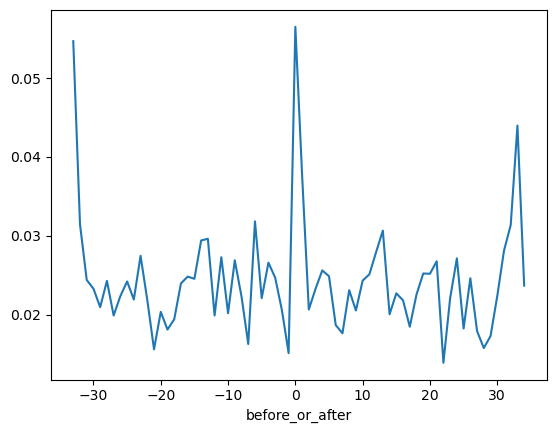

In [29]:
abs_log_return['mean'].plot()

In [30]:
abs_log_return.loc[abs_log_return.index == 0]

,count,mean,std,min,25%,50%,75%,max
before_or_after,,,,,,,,
0,24.0,0.056488,0.057814,0.000206,0.020827,0.039189,0.072164,0.218088


## Does insider selling after earnings reports affect price significantly?

There is an insider selling window for approximately one month after each earnings report

Strategy: Buy on the day of the earnings reaction and sell 20 trading days later.

In [31]:
# Go back to using analysis_df, not trimmed_df
analysis_df.loc[analysis_df['earnings_reaction_day'] ==True, 'buy_setup_int'] = 1
analysis_df.loc[analysis_df['earnings_reaction_day'] == False, 'buy_setup_int'] = 0

In [32]:
analysis_df

,Close,Earnings_Date,log_return,abs_log_return,earnings_reaction_day,days_after_earnings,days_before_earnings,before_or_after,buy_setup_int
Date,,,,,,,,,
2017-12-01 05:00:00+00:00,48.899681,NaT,NaN,NaN,False,0,47,0,0.0
2017-12-04 05:00:00+00:00,46.173691,NaT,-0.057361,0.057361,False,1,46,1,0.0
2017-12-05 05:00:00+00:00,46.440857,NaT,0.005769,0.005769,False,2,45,2,0.0
2017-12-06 05:00:00+00:00,46.816837,NaT,0.008063,0.008063,False,3,44,3,0.0
2017-12-07 05:00:00+00:00,47.492165,NaT,0.014322,0.014322,False,4,43,4,0.0
...,...,...,...,...,...,...,...,...,...
2024-02-13 05:00:00+00:00,721.280029,NaT,-0.001662,0.001662,False,55,4,-4,0.0
2024-02-14 05:00:00+00:00,739.000000,NaT,0.024270,0.024270,False,56,3,-3,0.0
2024-02-15 05:00:00+00:00,726.580017,NaT,-0.016949,0.016949,False,57,2,-2,0.0


In [33]:
# Make a new dataframe to avoid the following statements getting a SettingsWithCopyWarning
new_analysis_df = analysis_df

### Set target position for each period

In [34]:
# Set target position to 1 (100%) for the holding period after a buy setup
new_analysis_df.loc[new_analysis_df['buy_setup_int'].rolling(holding_period).sum() >= 1, 'target_position'] = 1.00
new_analysis_df.loc[new_analysis_df['buy_setup_int'].rolling(holding_period).sum() < 1, 'target_position'] = 0.00

In [35]:
new_analysis_df.loc[new_analysis_df['target_position'] == 1]

,Close,Earnings_Date,log_return,abs_log_return,earnings_reaction_day,days_after_earnings,days_before_earnings,before_or_after,buy_setup_int,target_position
Date,,,,,,,,,,
2018-02-09 05:00:00+00:00,57.409149,NaT,0.064791,0.064791,True,0,0,0,1.0,1.0
2018-02-12 05:00:00+00:00,56.407299,NaT,-0.017605,0.017605,False,1,62,1,0.0,1.0
2018-02-13 05:00:00+00:00,57.545185,NaT,0.019972,0.019972,False,2,61,2,0.0,1.0
2018-02-14 05:00:00+00:00,59.719559,NaT,0.037089,0.037089,False,3,60,3,0.0,1.0
2018-02-15 05:00:00+00:00,60.976181,NaT,0.020824,0.020824,False,4,59,4,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2023-12-14 05:00:00+00:00,483.500000,NaT,0.005434,0.005434,False,15,44,15,0.0,1.0
2023-12-15 05:00:00+00:00,488.899994,NaT,0.011107,0.011107,False,16,43,16,0.0,1.0
2023-12-18 05:00:00+00:00,500.769989,NaT,0.023989,0.023989,False,17,42,17,0.0,1.0


## Calculate net changes of entire time period (population) and of trades (sample)

In [36]:
# Select the days with buy or sell setups
transactions = new_analysis_df.loc[
    ((new_analysis_df['target_position'] == 1) & (new_analysis_df['target_position'].shift(1) == 0))
    | ((new_analysis_df['target_position'] == 0) & (new_analysis_df['target_position'].shift(1) == 1))][['Close', 'buy_setup_int']]

In [37]:
# Calculate forward return
transactions['exit_close'] = transactions['Close'].shift(-1)
transactions['y_log_return'] = np.log(transactions['Close'].shift(-1)) - np.log(transactions['Close'])

In [38]:
transactions

,Close,buy_setup_int,exit_close,y_log_return
Date,,,,
2018-02-09 05:00:00+00:00,57.409149,1.0,61.820999,0.074039
2018-03-12 04:00:00+00:00,61.820999,0.0,63.001686,0.018918
2018-05-11 04:00:00+00:00,63.001686,1.0,64.548988,0.024263
2018-06-11 04:00:00+00:00,64.548988,0.0,60.635727,-0.062540
2018-08-17 04:00:00+00:00,60.635727,1.0,67.882629,0.112896
2018-09-17 04:00:00+00:00,67.882629,0.0,40.747429,-0.510387
2018-11-16 05:00:00+00:00,40.747429,1.0,36.449661,-0.111461
2018-12-18 05:00:00+00:00,36.449661,0.0,39.029469,0.068385
2019-02-15 05:00:00+00:00,39.029469,1.0,41.952610,0.072224


In [39]:
trades = transactions.loc[transactions['buy_setup_int'] == 1].dropna()

In [40]:
trades

,Close,buy_setup_int,exit_close,y_log_return
Date,,,,
2018-02-09 05:00:00+00:00,57.409149,1.0,61.820999,0.074039
2018-05-11 04:00:00+00:00,63.001686,1.0,64.548988,0.024263
2018-08-17 04:00:00+00:00,60.635727,1.0,67.882629,0.112896
2018-11-16 05:00:00+00:00,40.747429,1.0,36.449661,-0.111461
2019-02-15 05:00:00+00:00,39.029469,1.0,41.952610,0.072224
2019-05-17 04:00:00+00:00,38.868549,1.0,36.054050,-0.075166
2019-08-16 04:00:00+00:00,39.666168,1.0,44.844051,0.122692
2019-11-15 05:00:00+00:00,50.811310,1.0,56.068401,0.098453
2020-02-14 05:00:00+00:00,72.165497,1.0,48.938141,-0.388405


In [41]:
# Get log returns for the entire population based on the holding period
population = new_analysis_df.iloc[::holding_period][['Close', 'buy_setup_int']]

In [42]:
# Calculate forward net return
population['exit_close'] = population['Close'].shift(-1)
population['y_log_return'] = np.log(population['Close'].shift(-1)) - np.log(population['Close'])

In [43]:
population

,Close,buy_setup_int,exit_close,y_log_return
Date,,,,
2017-12-01 05:00:00+00:00,48.899681,0.0,49.312790,0.008413
2018-01-02 05:00:00+00:00,49.312790,0.0,60.803032,0.209456
2018-01-31 05:00:00+00:00,60.803032,0.0,57.476997,-0.056255
2018-03-01 05:00:00+00:00,57.476997,0.0,57.323521,-0.002674
2018-03-29 04:00:00+00:00,57.323521,0.0,56.021564,-0.022974
...,...,...,...,...
2023-10-20 04:00:00+00:00,413.833618,0.0,492.936676,0.174917
2023-11-17 05:00:00+00:00,492.936676,0.0,500.769989,0.015766
2023-12-18 05:00:00+00:00,500.769989,0.0,571.070007,0.131365


## Calculate backtest statistics

In [44]:
trades['y_log_return'].describe()

count    24.000000
mean     -0.004234
std       0.143523
min      -0.388405
25%      -0.063370
50%       0.039343
75%       0.082049
max       0.206233
Name: y_log_return, dtype: float64

In [45]:
print("The sample mean log return is ", trades['y_log_return'].mean())
print("The population mean log return is ", population['y_log_return'].mean())

The sample mean log return is  -0.0042341504751411034
The population mean log return is  0.034597150546906756


In [46]:
print("Backtest sample statistics (log returns):")
print("Mean: ", trades['y_log_return'].mean())
print("Standard deviation: ", trades['y_log_return'].std())
print("N: ", trades['y_log_return'].count())
print("t: ", (trades['y_log_return'].mean() - population['y_log_return'].mean()) /
      (trades['y_log_return'].std() / (trades['y_log_return'].count() ** 0.5)))

Backtest sample statistics (log returns):
Mean:  -0.0042341504751411034
Standard deviation:  0.1435229499011642
N:  24
t:  -1.3254587314145028


In [47]:
trades.iloc[-10:]

,Close,buy_setup_int,exit_close,y_log_return
Date,,,,
2021-08-19 04:00:00+00:00,197.648254,1.0,218.671600,0.101082
2021-11-18 05:00:00+00:00,316.275024,1.0,277.627106,-0.130333
2022-02-17 05:00:00+00:00,244.732468,1.0,264.210693,0.076581
2022-05-26 04:00:00+00:00,178.294495,1.0,168.521988,-0.056370
2022-08-25 04:00:00+00:00,178.951599,1.0,125.072495,-0.358222
2022-11-17 05:00:00+00:00,156.660385,1.0,165.636520,0.055715
2023-02-23 05:00:00+00:00,236.535065,1.0,271.835571,0.139101
2023-05-25 04:00:00+00:00,379.696014,1.0,406.250793,0.067600
2023-08-24 04:00:00+00:00,471.549683,1.0,416.063416,-0.125187
